In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from prompt_toolkit.shortcuts.progress_bar import Label

from data_parse import DataParser
from keypoint import Keypoint
import pandas as pd

In [2]:
directory = 'data/SoccerNetGS/gamestate-2024/train/'
data_parser = DataParser(directory)
data = data_parser.parse_data_to_df()

Wczytywanie danych...


100%|██████████| 58/58 [00:13<00:00,  4.39it/s]


Tworzenie DataFrame...


100%|██████████| 57/57 [00:04<00:00, 12.88it/s]


In [3]:
one_img_data = data[data['image_id'] == '1060000001']

In [4]:
positional_data: pd.DataFrame = data_parser.get_shirts_data()

In [5]:
positional_data

,image_id,bbox_image_x,bbox_image_y,bbox_image_w,bbox_image_h,attributes_team
1060000001,1060000001,914,855,55,172,left
1060000002,1060000001,917,575,32,122,left
1060000003,1060000001,956,557,53,133,right
1060000004,1060000001,1257,673,44,141,right
1060000005,1060000001,1888,400,30,101,right
...,...,...,...,...,...,...
1170014150,1170000750,1567,407,30,63,left
1170014151,1170000750,419,473,61,92,right
1170014152,1170000750,1681,390,29,70,left
1170014153,1170000750,1144,455,42,83,left


In [6]:
pitch_data: pd.DataFrame = data_parser.get_pitch_data_df()

42750it [00:00, 43269.26it/s]


In [7]:
pitch_data_one_img = pitch_data[pitch_data['image_id'] == 1060000233]

In [11]:
keypoint = Keypoint(None)
lines = keypoint.get_func_pattern(pitch_data_one_img)

100%|██████████| 1/1 [00:00<00:00, 250.05it/s]


In [12]:
lines

{np.int64(1060000233): {17: (np.float64(0.04371318804793325),
   np.float64(298.6067819712584)),
  15: (np.float64(-0.19905488971622756), np.float64(470.79766666666626)),
  6: (np.float64(0.06305632776056667), np.float64(378.40451113693877)),
  5: (np.float64(-0.21982243637024626), np.float64(512.8810877576235)),
  4: (np.float64(0.08953102066286513), np.float64(489.4894999999998)),
  1: (np.float64(0.12325928737829459), np.float64(611.768166666667)),
  14: (np.float64(0.1970142654434381), np.float64(938.5872103667278)),
  2: (np.float64(-0.28845183214073233), np.float64(642.0999589445009)),
  3: (np.float64(0.053000896488348256), np.float64(336.5958508731873)),
  0: <ellipse.Ellipse at 0x1e2d2b81370>}}

In [13]:
keypoints = keypoint.get_all_keypoints_by_id(np.int64(1060000233))

17
[13, 15, 16]
15
[1, 3, 4, 6, 14, 17]
6
[5, 15]
5
[4, 6]
4
[5, 15]
1
[2, 15]
14
[13, 15, 16]
2
[1, 3]
3
[2, 15]
0
[13]


In [14]:
keypoints

[(np.float64(73.6725117195486), np.float64(620.8489879605876)),
 (np.float64(352.49599929048225), np.float64(400.6316144024879)),
 None,
 (np.float64(709.2814108067545), np.float64(329.6117336607574)),
 None,
 None,
 (np.float64(894.718602185142), np.float64(384.0167388938017)),
 (np.float64(75.61443787298622), np.float64(496.2593377996171)),
 (np.float64(475.3859026282302), np.float64(408.3806004258173)),
 (np.float64(532.4290222187435), np.float64(364.8150663671954))]

In [15]:
keypoints_not_none = [point for point in keypoints if point is not None]

In [16]:
keypoints_np = np.array([[x, y] for x, y in keypoints_not_none])

In [17]:
keypoints_np = keypoints_np[:4]

In [18]:
keypoints_np

array([[     73.673,      620.85],
       [      352.5,      400.63],
       [     709.28,      329.61],
       [     894.72,      384.02]])

In [19]:
image = cv2.imread('data/SoccerNetGS/gamestate-2024/train/SNGS-060/img1/000233.jpg')
for point in keypoints[-4:]:
    if point is not None:
        cv2.circle(image, (int(point[0]), int(point[1])), 5, (0, 0, 255), -1)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
real_pitch_coordinates = np.array([[16.5, 13.85], [0.0, 43.15], [0.0, 68.0], [16.5, 54.15]])

In [ ]:
print(real_pitch_coordinates)

In [21]:
homography_mat, mask = cv2.findHomography(keypoints_np, real_pitch_coordinates)

In [22]:
homography_mat

array([[   -0.16816,    -0.84479,      397.72],
       [  -0.054803,     0.38582,      -352.3],
       [ 0.00018781,   -0.015217,           1]])

In [23]:
# pith size in meters
pitch_length = 105
pitch_width = 68

In [24]:
positional_data_one_img = positional_data[positional_data['image_id'] == '1060000233']
positional_data_one_img

,image_id,bbox_image_x,bbox_image_y,bbox_image_w,bbox_image_h,attributes_team
1060004248,1060000233,1554,590,45,90,left
1060004249,1060000233,306,443,51,67,right
1060004250,1060000233,533,560,50,79,right
1060004251,1060000233,1903,579,15,83,right
1060004252,1060000233,1168,604,50,76,right
1060004253,1060000233,1651,457,27,69,right
1060004254,1060000233,958,386,19,52,right
1060004255,1060000233,1619,355,22,46,left
1060004257,1060000233,1589,436,25,65,left
1060004258,1060000233,1078,467,30,68,left


In [25]:
player_position_df = positional_data_one_img.copy()
player_position_df['x'] = player_position_df['bbox_image_x'] + player_position_df['bbox_image_w'] / 2

In [26]:
player_position_df['y'] = player_position_df['bbox_image_y'] + player_position_df['bbox_image_h'] / 2

In [27]:
player_position_df.drop(columns=['bbox_image_x', 'bbox_image_y', 'bbox_image_w', 'bbox_image_h'], inplace=True)

In [28]:
player_position_df

,image_id,attributes_team,x,y
1060004248,1060000233,left,1576.5,635.0
1060004249,1060000233,right,331.5,476.5
1060004250,1060000233,right,558.0,599.5
1060004251,1060000233,right,1910.5,620.5
1060004252,1060000233,right,1193.0,642.0
1060004253,1060000233,right,1664.5,491.5
1060004254,1060000233,right,967.5,412.0
1060004255,1060000233,left,1630.0,378.0
1060004257,1060000233,left,1601.5,468.5
1060004258,1060000233,left,1093.0,501.0


In [29]:
player_position_df_np = player_position_df.to_numpy()

In [30]:
player_position_df_np

array([['1060000233', 'left', 1576.5, 635.0],
       ['1060000233', 'right', 331.5, 476.5],
       ['1060000233', 'right', 558.0, 599.5],
       ['1060000233', 'right', 1910.5, 620.5],
       ['1060000233', 'right', 1193.0, 642.0],
       ['1060000233', 'right', 1664.5, 491.5],
       ['1060000233', 'right', 967.5, 412.0],
       ['1060000233', 'left', 1630.0, 378.0],
       ['1060000233', 'left', 1601.5, 468.5],
       ['1060000233', 'left', 1093.0, 501.0],
       ['1060000233', 'left', 945.0, 401.5],
       ['1060000233', 'left', 811.0, 934.5],
       ['1060000233', 'left', 334.0, 623.5]], dtype=object)

In [31]:
points_src = player_position_df.drop(columns=['image_id', 'attributes_team']).to_numpy()

In [32]:
points_src = np.array([[x, y] for x, y in points_src])

In [33]:
points_src

array([[     1576.5,         635],
       [      331.5,       476.5],
       [        558,       599.5],
       [     1910.5,       620.5],
       [       1193,         642],
       [     1664.5,       491.5],
       [      967.5,         412],
       [       1630,         378],
       [     1601.5,       468.5],
       [       1093,         501],
       [        945,       401.5],
       [        811,       934.5],
       [        334,       623.5]])

In [34]:
points_src = points_src.reshape(-1, 1, 2)

In [35]:
points_dst = cv2.perspectiveTransform(points_src, homography_mat)

In [36]:
points_dst = points_dst.reshape(-1, 2)

In [37]:
points_dst

array([[     48.267,      23.152],
       [     9.7863,      30.157],
       [     25.265,      18.906],
       [     55.392,       26.92],
       [     40.403,      19.893],
       [     48.228,      41.173],
       [     22.216,      48.425],
       [     44.021,      66.533],
       [     45.875,      44.492],
       [     32.612,      34.107],
       [     20.351,      50.524],
       [     40.414,        2.77],
       [     21.979,      15.436]])

In [38]:
points_dst[:, 1] = 68 - points_dst[:, 1]

In [39]:
points_dst

array([[     48.267,      44.848],
       [     9.7863,      37.843],
       [     25.265,      49.094],
       [     55.392,       41.08],
       [     40.403,      48.107],
       [     48.228,      26.827],
       [     22.216,      19.575],
       [     44.021,      1.4668],
       [     45.875,      23.508],
       [     32.612,      33.893],
       [     20.351,      17.476],
       [     40.414,       65.23],
       [     21.979,      52.564]])

In [40]:
from mplsoccer import Pitch, Sbopen
import matplotlib.pyplot as plt

# read data
parser = Sbopen()
df, related, freeze, tactics = parser.event(7478)

In [41]:
df = df[(df.player_name == 'Jodie Taylor') & (df.type_name == 'Pass')].copy()

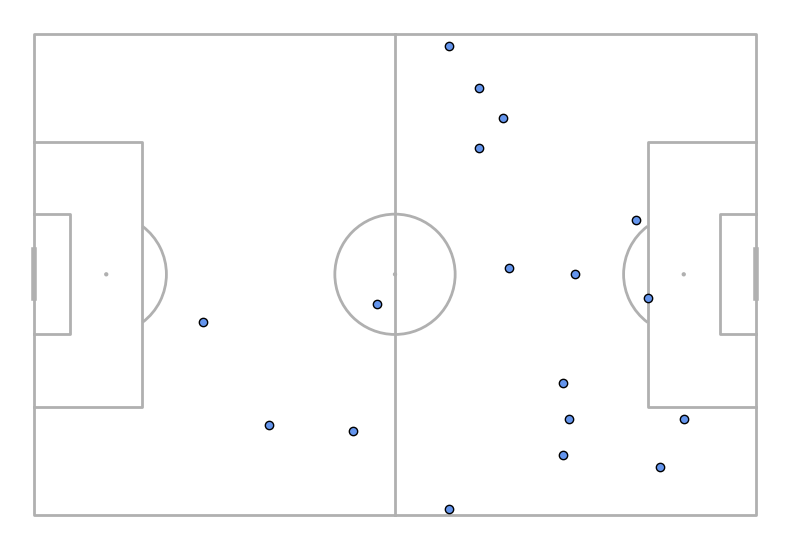

In [42]:
pitch = Pitch()
fig, ax = pitch.draw(figsize=(8, 6))
scatter = pitch.scatter(df.x, df.y, ax=ax, edgecolor='black', facecolor='cornflowerblue')
plt.show()

In [43]:
team = player_position_df['attributes_team'].to_numpy()

In [44]:
team = np.where(team == 'left', 1, 0)

In [45]:
team

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

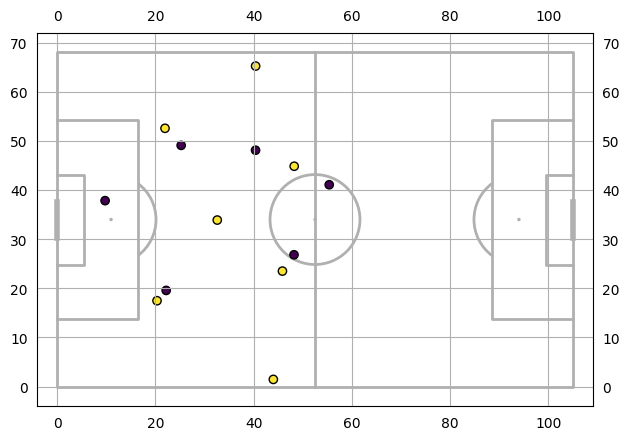

In [46]:
pitch = Pitch(pitch_type='uefa', axis=True, label=True)
fig, ax = pitch.draw()
scatter = pitch.scatter(points_dst[:, 0], points_dst[:, 1], ax=ax, edgecolor="black", c=team)
plt.grid()

In [47]:
plt.show()

In [48]:
points_dst[1:, 1]

array([     37.843,      49.094,       41.08,      48.107,      26.827,      19.575,      1.4668,      23.508,      33.893,      17.476,       65.23,      52.564])

In [49]:
pitch_length = 105
pitch_width = 68
corner_to_box_edge = 13.85
box_edge_to_goal = 16.5
goal_width = 7.32
inside_box_edge_to_goal = 5.5
box_length = 16.5
inside_box_length = 5.5
circle_radius = 9.15
big_box_edge_to_inside_box_edge = box_edge_to_goal - inside_box_edge_to_goal

real_pitch_coordinates_full = np.array([
    [0.0, 0.0],
    [0.0, corner_to_box_edge],
    [0.0, corner_to_box_edge + big_box_edge_to_inside_box_edge],
    [0.0, 68.0 - corner_to_box_edge - big_box_edge_to_inside_box_edge],
    [0.0, 68.0 - corner_to_box_edge],
    [0.0, 68.0],
    
    [inside_box_length, corner_to_box_edge + big_box_edge_to_inside_box_edge],
    [inside_box_length, 68 - corner_to_box_edge - big_box_edge_to_inside_box_edge],
    
    [11.0, pitch_width/2],
    
    [box_length, corner_to_box_edge],
    [box_length, 34.0 - 7.66],
    [box_length, 34.0 + 7.66],
    [box_length, 68 - corner_to_box_edge],
        
    [pitch_length/2, 0.0],
    [pitch_length/2, pitch_width/2 - circle_radius],
    [pitch_length/2, pitch_width/2 + circle_radius],
    [pitch_length/2, 68.0],
        
    [pitch_length - box_length, corner_to_box_edge],
    [pitch_length - box_length, 34.0 - 7.66],
    [pitch_length - box_length, 34.0 + 7.66],
    [pitch_length - box_length, 68 - corner_to_box_edge],
    
    [pitch_length - 11.0, pitch_width/2],
    
    [pitch_length - inside_box_length, corner_to_box_edge + big_box_edge_to_inside_box_edge],
    [pitch_length - inside_box_length, 68 - corner_to_box_edge - big_box_edge_to_inside_box_edge],
    
    [pitch_length, 0.0],
    [pitch_length, corner_to_box_edge],
    [pitch_length, corner_to_box_edge + big_box_edge_to_inside_box_edge],
    [pitch_length, 68.0 - corner_to_box_edge - big_box_edge_to_inside_box_edge],
    [pitch_length, 68.0 - corner_to_box_edge],
    [pitch_length, 68.0],
    
    [pitch_length/2 - circle_radius, pitch_width/2],
    [pitch_length/2 + circle_radius, pitch_width/2],
])

In [50]:
real_pitch_coordinates_full

array([[          0,           0],
       [          0,       13.85],
       [          0,       24.85],
       [          0,       43.15],
       [          0,       54.15],
       [          0,          68],
       [        5.5,       24.85],
       [        5.5,       43.15],
       [         11,          34],
       [       16.5,       13.85],
       [       16.5,       26.34],
       [       16.5,       41.66],
       [       16.5,       54.15],
       [       52.5,           0],
       [       52.5,       24.85],
       [       52.5,       43.15],
       [       52.5,          68],
       [       88.5,       13.85],
       [       88.5,       26.34],
       [       88.5,       41.66],
       [       88.5,       54.15],
       [         94,          34],
       [       99.5,       24.85],
       [       99.5,       43.15],
       [        105,           0],
       [        105,       13.85],
       [        105,       24.85],
       [        105,       43.15],
       [        105,